In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras. utils.vis_utils import plot_model

In [43]:
#Get the Dataset
df=pd.read_csv('Book1.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [44]:
print("Dataframe Shape:", df. shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (2036, 7)
Null Value Present: True


<Axes: xlabel='Date'>

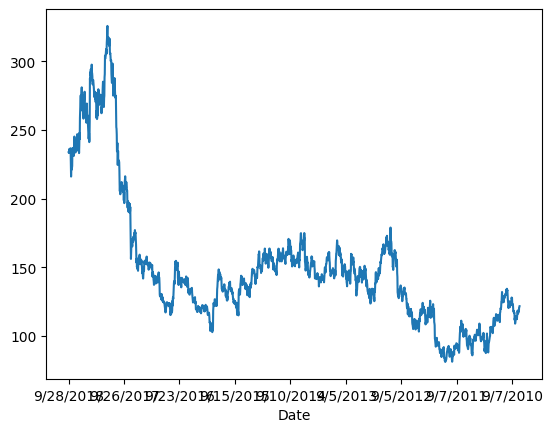

In [45]:
df['Close'].plot()

In [46]:
output_var =pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Total Trade Quantity']

In [47]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Total Trade Quantity
Date,,,,
9/28/2018,0.620235,0.622688,0.621560,0.103951
9/27/2018,0.622263,0.626144,0.625285,0.173002
9/26/2018,0.644363,0.639154,0.631078,0.075513
9/25/2018,0.617194,0.625940,0.629009,0.079233
9/24/2018,0.618208,0.635902,0.623836,0.116080


In [48]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [49]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

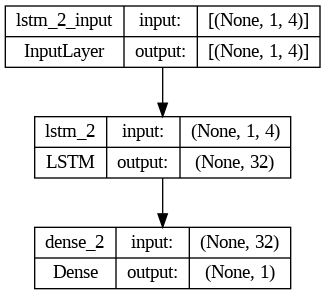

In [50]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [51]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 2s 3ms/step - loss: 25802.5723
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 25068.4473
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 22745.6113
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 18867.7031
Epoch 5/100
232/232 [==============================] - 1s 3ms/step - loss: 14320.0195
Epoch 6/100
232/232 [==============================] - 1s 2ms/step - loss: 9955.0449
Epoch 7/100
232/232 [==============================] - 1s 2ms/step - loss: 6301.7056
Epoch 8/100
232/232 [==============================] - 1s 4ms/step - loss: 3594.0068
Epoch 9/100
232/232 [==============================] - 1s 4ms/step - loss: 1827.3717
Epoch 10/100
232/232 [==============================] - 1s 3ms/step - loss: 828.1717
Epoch 11/100
232/232 [==============================] - 1s 3ms/step - loss: 346.4765
Epoch 12/100
232/232 [==============================] - 1s 2

In [52]:
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 2ms/step


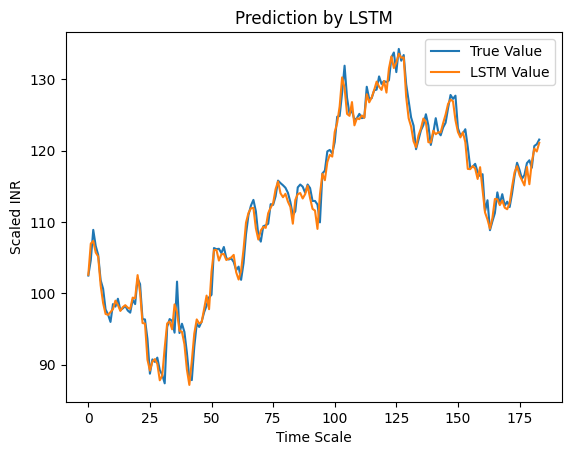

In [53]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled INR')
plt.legend()
plt.show()